<a href="https://colab.research.google.com/github/dinky-coder/dinky-coder/blob/main/Flight_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_excel('/content/flight_price.xlsx')

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
df.shape

(10683, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
# check the null values
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [12]:
df.dropna(subset=['Route','Total_Stops'],inplace=True)

In [13]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [14]:
# column wise analysis
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [16]:
df['Airline'].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1751
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


In [17]:
df['Date_of_Journey']

,Date_of_Journey
0,24/03/2019
1,1/05/2019
2,9/06/2019
3,12/05/2019
4,01/03/2019
...,...
10678,9/04/2019
10679,27/04/2019
10680,27/04/2019
10681,01/03/2019


In [18]:
df['Date_of_Journey'].str.split('/')

,Date_of_Journey
0,"[24, 03, 2019]"
1,"[1, 05, 2019]"
2,"[9, 06, 2019]"
3,"[12, 05, 2019]"
4,"[01, 03, 2019]"
...,...
10678,"[9, 04, 2019]"
10679,"[27, 04, 2019]"
10680,"[27, 04, 2019]"
10681,"[01, 03, 2019]"


In [19]:
df['Days']= df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['Month']= df['Date_of_Journey'].str.split('/').str[1].astype(int)
df['Year']= df['Date_of_Journey'].str.split('/').str[2].astype(int)

In [20]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Days,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [21]:
del df['Date_of_Journey']

In [22]:
df['Source'].value_counts()

,count
Source,
Delhi,4536
Kolkata,2871
Banglore,2197
Mumbai,697
Chennai,381


In [23]:
df['Destination'].value_counts()

,count
Destination,
Cochin,4536
Banglore,2871
Delhi,1265
New Delhi,932
Hyderabad,697
Kolkata,381


In [24]:
del df['Route']

In [25]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Days,Month,Year
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [26]:
df['Dep_Hours']= df['Dep_Time'].str.split(':').str[0].astype(int)
df['Dep_Minutes']= df['Dep_Time'].str.split(':').str[1].astype(int)

In [27]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Days,Month,Year,Dep_Hours,Dep_Minutes
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [28]:
del df['Dep_Time']

In [29]:
df['Arrival Hours']= df['Arrival_Time'].str.split(" ").str[0].str.split(':').str[0]

In [30]:
df['Arrival Minutes']= df['Arrival_Time'].str.split(" ").str[0].str.split(':').str[1]

In [31]:
df.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Days,Month,Year,Dep_Hours,Dep_Minutes,Arrival Hours,Arrival Minutes
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,01,10
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,04,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [32]:
del df['Arrival_Time']

In [33]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Days,Month,Year,Dep_Hours,Dep_Minutes,Arrival Hours,Arrival Minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,01,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,9,25,04,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [34]:
df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [36]:
df['Duration']= df['Duration'].replace('5m','0h 5m')

In [37]:
df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [38]:
df['Duration'].value_counts()

,count
Duration,
2h 50m,550
1h 30m,386
2h 55m,337
2h 45m,337
2h 35m,329
...,...
30h 10m,1
31h 30m,1
42h 5m,1


In [39]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Days,Month,Year,Dep_Hours,Dep_Minutes,Arrival Hours,Arrival Minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,01,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,9,25,04,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [40]:
df['DH'] =  df['Duration'].str.split(" ").str[0].str.split('h').str[0].astype(int)*60
# str.replace("h","")

In [44]:
df['DM'] =  df['Duration'].str.split(" ").str[1].str.split('m').str[0].fillna(0).astype(int)

In [45]:
df['DM'] =  df['Duration'].str.split(" ").str[1].str.split('m').str[0].fillna(0).astype(int)

In [46]:
df['DM']

,DM
0,50
1,25
2,0
3,25
4,45
...,...
10678,30
10679,35
10680,0
10681,40


In [47]:
df['Total Duration'] = df['DH']+ df['DM']

In [48]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Days,Month,Year,Dep_Hours,Dep_Minutes,Arrival Hours,Arrival Minutes,DH,DM,Total Duration
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,01,10,120,50,170
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,420,25,445
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,9,25,04,25,1140,0,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,300,25,325
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,240,45,285


In [49]:
del df['Duration']

In [50]:
# df['DH']= df['Duration'].str.split(" ").str[0].str.replace("h","").astype(int)*60

In [51]:
del df['DH']

In [52]:
del df['DM']

In [53]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Days,Month,Year,Dep_Hours,Dep_Minutes,Arrival Hours,Arrival Minutes,Total Duration
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,01,10,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,04,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,21,35,285


In [54]:
del df['Additional_Info']

In [55]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [56]:
df['Total_Stops'].value_counts()

,count
Total_Stops,
1 stop,5625
non-stop,3491
2 stops,1520
3 stops,45
4 stops,1


In [57]:
# str.replace("non-stop",0).astype(int)
# str.replace("1 stop",1).astype(int)

  Total_Stops         Price
0      1 stop  10594.123556
1     2 stops  12715.807895
2     3 stops  13112.000000
3     4 stops  17686.000000
4    non-stop   5024.900315


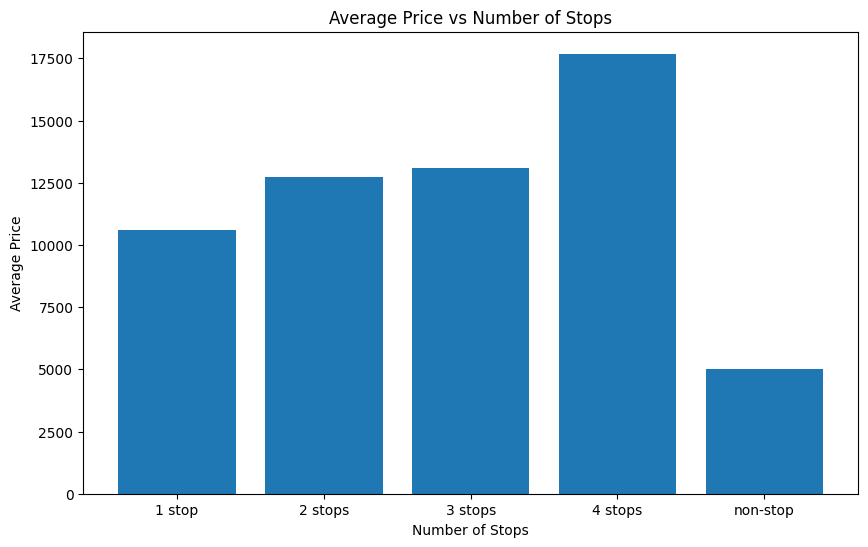

In [58]:
# prompt: average price vs number of stops

average_price_by_stops = df.groupby('Total_Stops')['Price'].mean().reset_index()
print(average_price_by_stops)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(average_price_by_stops['Total_Stops'], average_price_by_stops['Price'])
plt.xlabel('Number of Stops')
plt.ylabel('Average Price')
plt.title('Average Price vs Number of Stops')
plt.show()


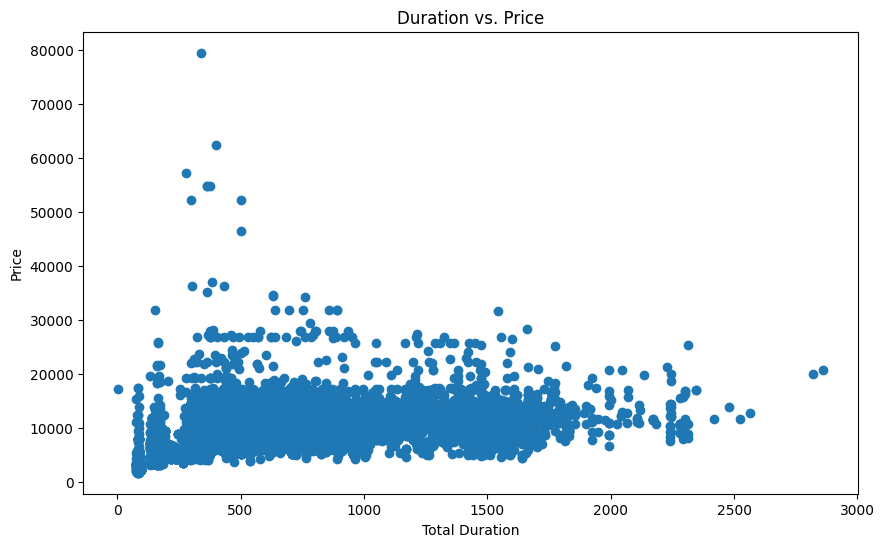

In [60]:
# duration vs. price
plt.figure(figsize=(10, 6))
plt.scatter(df['Total Duration'], df['Price'])
plt.xlabel('Total Duration')
plt.ylabel('Price')
plt.title('Duration vs. Price')
plt.show()

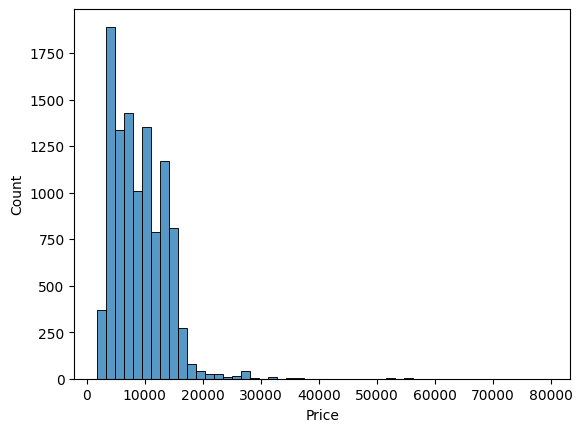

In [63]:
# distribution of price
import seaborn as sns
sns.histplot(df['Price'], bins=50)
plt.show()

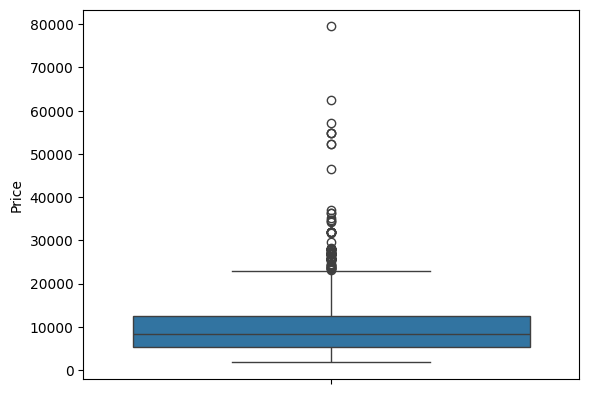

In [64]:
# outliers in data
sns.boxplot(df['Price'])
plt.show()
